# 第一部分：课堂代码复现

### 一：针对特定语法生成句子 
思路：对树梢结构，直接用随机选择的方式
         对可再分结构， 使用递归方式返回子成分 
         
存疑：adj_star是否使用lambda的区别

In [3]:
simple_grammar = """
sentence => noun_phrase verb_phrase
noun_phrase => Article Adj* noun
Adj* => null | Adj Adj*
verb_phrase => verb noun_phrase
Article =>  一个 | 这个
noun =>   女人 |  篮球 | 桌子 | 小猫
verb => 看着   |  坐在 |  听着 | 看见
Adj =>  蓝色的 | 好看的 | 小小的
"""

In [4]:
import random

In [5]:
def adj(): return random.choice('蓝色的 | 好看的 | 小小的'.split('|')).split()[0]
def noun(): return random.choice('女人 |  篮球 | 桌子 | 小猫'.split('|')).split()[0]
def verb(): return random.choice('看着   |  坐在 |  听着 | 看见'.split('|')).split()[0]
def article(): return random.choice('一个 | 这个'.split('|')).split()[0]
def adj_star(): return random.choice([lambda:'',lambda:adj()+adj_star()])()
#def adj_star():return random.choice(['',adj()+adj_star()])
def noun_phrase(): return article()+adj_star()+noun()
def verb_phrase(): return verb()+noun_phrase()
def sentence(): return noun_phrase()+verb_phrase()

In [6]:
sentence()

'这个小小的好看的小小的女人看着这个蓝色的好看的篮球'

### 二： 根据语法规则自动生成句子
思路：只要按照一定规则书写的语法，可以自动拆解语法中的各个成分，创建语法规则函数

In [7]:
def createGrammar(grammar, split_='=>'):
    grammar_dict = {}
    for line in grammar.split('\n'):
        if not line: continue
        grammar_name, comp = line.split(split_)
        grammar_dict[grammar_name.split()[0]] = [i.split() for i in comp.split('|')] ## 这一句是重点， 对每个i还要再细分
    return grammar_dict
createGrammar(simple_grammar)

{'sentence': [['noun_phrase', 'verb_phrase']],
 'noun_phrase': [['Article', 'Adj*', 'noun']],
 'Adj*': [['null'], ['Adj', 'Adj*']],
 'verb_phrase': [['verb', 'noun_phrase']],
 'Article': [['一个'], ['这个']],
 'noun': [['女人'], ['篮球'], ['桌子'], ['小猫']],
 'verb': [['看着'], ['坐在'], ['听着'], ['看见']],
 'Adj': [['蓝色的'], ['好看的'], ['小小的']]}

In [8]:
def generate_(grammar_exp, target):#  target的子成分 由generate函数递归生成, grammar_exp是未经处理的文本类型的语法规则
    grammar_dict = createGrammar(grammar_exp)
    sub_generate = random.choice(grammar_dict[target])
    if sub_generate[0] not in grammar_dict:
        if sub_generate[0] == 'null':return ''
        else: return sub_generate[0]
    else: 
        return ''.join([generate_(grammar_exp,sub_target)  for sub_target in sub_generate ])

generate_(simple_grammar,'sentence')

'这个小小的好看的篮球看见一个好看的蓝色的小猫'

In [9]:
def generate(grammar_dict,target):
    if target not in grammar_dict: return target
    expand = [generate(grammar_dict,sub_target) for sub_target in random.choice(grammar_dict[target])]
    return ''.join([t if t != '\n'  else '\n' for t in expand if t != 'null'])


In [10]:
grammar_dict = createGrammar(simple_grammar)
generate(grammar_dict,'sentence')

'这个蓝色的好看的小猫坐在这个小小的小小的好看的小小的篮球'

In [11]:
#在西部世界里，一个”人类“的语言可以定义为：

human = """
human = 自己 寻找 活动
自己 = 我 | 俺 | 我们 
寻找 = 找找 | 想找点 
活动 = 乐子 | 玩的
"""


#一个“接待员”的语言可以定义为

host = """
host = 寒暄 报数 询问 业务相关 结尾 
报数 = 我是 数字 号 ,
数字 = 单个数字 | 数字 单个数字 
单个数字 = 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 
寒暄 = 称谓 打招呼 | 打招呼
称谓 = 人称 ,
人称 = 先生 | 女士 | 小朋友
打招呼 = 你好 | 您好 
询问 = 请问你要 | 您需要
业务相关 = 玩玩 具体业务
玩玩 = null
具体业务 = 喝酒 | 打牌 | 打猎 | 赌博
结尾 = 吗？
"""

In [12]:
host_dict = createGrammar(host,split_='=')
generate(host_dict,'host')

'小朋友,您好我是6号,请问你要赌博吗？'

In [13]:
programming = """
stmt => if_exp | while_exp | assignment 
assignment => var = var
if_exp => if ( var ) { /n .... stmt }
while_exp=> while ( var ) { /n .... stmt }
var => chars number
chars => char | char char
char => student | name | info  | database | course
number => 1 | 2 | 3
"""

In [14]:
program_dict = createGrammar(programming,split_='=>')
print(generate(program_dict,'stmt'))

if(infoname2){/n....if(coursecourse3){/n....info2=nameinfo1}}


### 三：根据概率模型判断句子出现概率
思路：用正则提取出文章中的正常字符，分词，统计词频（使用collection模块的Counter函数），计算1-gram模型的词频和2-gram的词频，分别去计算得到的句子的出现的概率

In [15]:
import pandas as pd

In [16]:
file = pd.read_csv('/Users/admin/A_NLP/datasource-master/sqlResult_1558435.csv',encoding='gb18030')

In [185]:
file.head(2)

,id,author,source,content,feature,title,url
0,89617,NaN,快科技@http://www.kkj.cn/,此外，自本周（6月12日）起，除小米手机6等15款机型外，其余机型已暂停更新发布（含开发版/...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""37""...",小米MIUI 9首批机型曝光：共计15款,http://www.cnbeta.com/articles/tech/623597.htm
1,89616,NaN,快科技@http://www.kkj.cn/,骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考...,"{""type"":""科技"",""site"":""cnbeta"",""commentNum"":""15""...",骁龙835在Windows 10上的性能表现有望改善,http://www.cnbeta.com/articles/tech/623599.htm


In [17]:
import re
def token(string):
    return re.findall('\w+',string)

In [193]:
token('骁龙835作为唯一通过Windows 10桌面平台认证的ARM处理器，高通强调，不会因为只考..')

['骁龙835作为唯一通过Windows', '10桌面平台认证的ARM处理器', '高通强调', '不会因为只考']

In [19]:
articles = file['content'].tolist()

In [20]:
clean_articles =  [''.join(token(str(a))) for a in articles]

In [240]:
import jieba
TOKEN = []
for a in clean_articles:
    TOKEN += jieba.cut(a)

In [250]:
token_len = len(TOKEN)

In [243]:
from collections import Counter

In [251]:
token_counts = Counter(TOKEN)

In [252]:
token_counts.most_common(10)

[('的', 703716),
 ('n', 382020),
 ('在', 263597),
 ('月', 189330),
 ('日', 166300),
 ('新华社', 142462),
 ('和', 134061),
 ('年', 123106),
 ('了', 121938),
 ('是', 100909)]

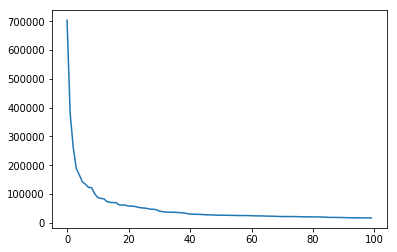

In [296]:
% matplotlib inline
import matplotlib.pyplot as plt
x = [i for i in range(100)]
frequence = [f for w,f in token_counts.most_common(100)]
plt.plot(x,frequence)

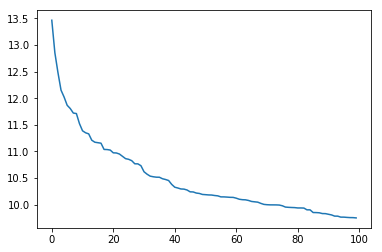

In [297]:
import numpy as np
plt.plot(x,np.log(frequence))

In [21]:
def prob_1(word):
    return token_counts[word]/token_len

In [254]:
prob_1('我们')

0.0011399627455473877

In [255]:
TOKEN2 = [TOKEN[i]+TOKEN[i+1] for i in range((len(TOKEN)-1))]

In [259]:
token2_len = len(TOKEN2)

In [256]:
TOKEN2[:10]

['此外自', '自本周', '本周6', '6月', '月12', '12日起', '日起除', '除小米', '小米手机', '手机6']

In [257]:
token_counts2 = Counter(TOKEN2)

In [258]:
token_counts2.most_common(10)

[('n新华社', 74664),
 ('2017年', 61480),
 ('外代二线', 61301),
 ('日n', 52293),
 ('新华社照片', 50401),
 ('5月', 37977),
 ('4月', 34571),
 ('新华社记者', 30864),
 ('２０', 27166),
 ('日在', 27154)]

In [22]:
def pro_2(word1,word2):
    if word1+word2 in TOKEN2:  return token_counts2[word1+word2]/token2_len
    else: return 1/token2_len

In [261]:
pro_2('我们','在')

3.069262296531585e-05

In [262]:
pro_2('在','街上')

2.224929917560071e-06

In [23]:
def sentence_pro(sentence):
    total_pro = 1
    words = list(jieba.cut(sentence))
    for i, word in enumerate(words[:-1]):
        next_word = words[i+1]
        total_pro *= pro_2(word,next_word)
    return total_pro
        

In [289]:
sentence_pro('养乐多绿来一杯')

3.254643746255006e-15

In [290]:
need_compared = [
    "今天晚上请你吃大餐，我们一起吃日料 明天晚上请你吃大餐，我们一起吃苹果",
    "真事一只好看的小猫 真是一只好看的小猫",
    "今晚我去吃火锅 今晚火锅去吃我",
    "洋葱奶昔来一杯 养乐多绿来一杯"
]
for s in need_compared:
    s1, s2 = s.split()
    p1, p2 = sentence_pro(s1), sentence_pro(s2)
    
    better = s1 if p1 > p2 else s2
    
    print('{} is more possible'.format(better))
    print('-'*4 + ' {} with probility {}'.format(s1, p1))
    print('-'*4 + ' {} with probility {}'.format(s2, p2))

今天晚上请你吃大餐，我们一起吃日料 is more possible
---- 今天晚上请你吃大餐，我们一起吃日料 with probility 1.9877949356148648e-66
---- 明天晚上请你吃大餐，我们一起吃苹果 with probility 1.590235948491892e-66
真是一只好看的小猫 is more possible
---- 真事一只好看的小猫 with probility 4.641088649507633e-34
---- 真是一只好看的小猫 with probility 8.135198142748278e-27
今晚我去吃火锅 is more possible
---- 今晚我去吃火锅 with probility 3.453568946204909e-20
---- 今晚火锅去吃我 with probility 5.508207075819147e-28
养乐多绿来一杯 is more possible
---- 洋葱奶昔来一杯 with probility 1.8567574979596284e-22
---- 养乐多绿来一杯 with probility 3.254643746255006e-15


# 第二部分 基础理论部分

#### 0. Can you come up out 3 sceneraies which use AI methods? 

Ans: { 智能问答系统，智能推荐系统， 图像识别}

#### 1. How do we use Github; Why do we use Jupyter and Pycharm;

Ans: {
1.对github了解的不够深入， 目前知道github两种下载方式，一个是用git工具可以同步项目到本地， 直接Download只能下载静态文件，如果想下载单个文件可以利用DownGit这个工具。针对自己感兴趣的项目，可以用star的方式进行收藏
2.Jupyter可以进行交互式编程，且运行过的代码变量会一直保留在内存中， 不必每次跑程序把全部程序全部跑一遍，在实验和平时调试时是一个很好用的工具
3.pycharm主要是工程性的项目用的比较多， 需要一次跑完所有代码或者项目最后集成的时候可以在pycharm中进行}

#### 2. What's the Probability Model?

Ans:
概率模型是能够表示一个或多个变量出现不同结果的几率的模型


#### 3. Can you came up with some sceneraies at which we could use Probability Model?

Ans: 抽签，抛色子

#### 4. Why do we use probability and what's the difficult points for programming based on parsing and pattern match?

Ans:在许多情形下可根据已知的概率模型对有可能发生的事件概率做预估，选出最有可能发生的事件。

#### 5. What's the Language Model;

Ans:
Language Model模型一般指n-gram模型，这个n的含义是一个词出现的概率只和与其前(n-1)个词有关。如2-gram概率模型可以用如下公式表述：
P(w1w2w3w4) = P(w1)*P(w2/w1)*P(w3/w2)*P(w4/w3)

#### 6. Can you came up with some sceneraies at which we could use Language Model?


Ans:
自然语言生成时对生成的候选的句子进行择优

#### 7. What's the 1-gram language model;

Ans:
1-gram language model 是假设每个词语之间没有联系，彼此的出现都是相互独立的

#### 8. What's the disadvantages and advantages of 1-gram language model;

Ans: 
缺点: 会在使用时出现一些问题，比如句子生成时，由于假设每个词语之间没有联系， 会导致生成的句子没有实际意义。
优点：模型简单， 计算量会少很多

#### 9. What't the 2-gram models;

Ans:
P(w1w2w3w4) = P(w1)*P(w2/w1)*P(w3/w2)*P(w4/w3)

# 第三部分 编程实践

### 一：定义自己的语法

In [106]:
gram1 = """
句子 => 业务 功能点 特性
业务 => app | 网页 | 用户界面 |客户端
功能点 => 验证 | 跳转 | 输入 | 更新 | null
特性 => 太慢 | 太丑 | 太差
"""

In [95]:
grammar_dict = createGrammar(gram1)
generate(grammar_dict,'产品经理')

'客户端验证太差'

In [137]:
gram2 = """
句子 => 指代 角度 描述
指代 => 这个 | 此 | 该 |
角度 => 电影 | 片子 | 情节 | 装备 | 环境 | 背景 | 道具 | 台词 | 演员
描述 => 程度 特点
程度 => 非常 | 有点 | 太 | 简直 |
特点 => 乱 | 恐怖 | 扯淡 | 差 | 还行 | 凑合 | 烂 | 好 | 精彩 | 激动 | 美
"""

In [109]:
grammar_dict = createGrammar(gram2)
generate(grammar_dict,'句子')

'此环境简直烂'

### 二：扩展generate函数一次生成n个句子

In [110]:
def generate_n(n,grammar_dict,target):
    sentences = []
    for i in range(n):
        sentences.append(generate(grammar_dict,target))
    return sentences

In [111]:
generate_n(5,grammar_dict,'句子')

['这个台词有点烂', '环境非常好', '此装备非常凑合', '此演员美', '此环境太烂']

### 三：使用新数据源完成语言模型的训练

In [43]:
import pandas as pd

In [44]:
data = pd.read_csv('/Users/admin/A_NLP/datasource-master/movie_comments.csv')

/Users/admin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [46]:
data.head(3)

,id,link,name,comment,star
0,1,https://movie.douban.com/subject/26363254/,战狼2,吴京意淫到了脑残的地步，看了恶心想吐,1
1,2,https://movie.douban.com/subject/26363254/,战狼2,首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。各种装备轮...,2
2,3,https://movie.douban.com/subject/26363254/,战狼2,吴京的炒作水平不输冯小刚，但小刚至少不会用主旋律来炒作…吴京让人看了不舒服，为了主旋律而主旋...,2


In [48]:
comments = data['comment'].tolist()

In [51]:
token('首映礼看的。太恐怖了这个电影，不讲道理的，完全就是吴京在实现他这个小粉红的英雄梦。')  

['首映礼看的', '太恐怖了这个电影', '不讲道理的', '完全就是吴京在实现他这个小粉红的英雄梦']

In [54]:
clean_comments =''.join([''.join(token(str(comment))) for comment in comments])

In [59]:
import jieba
TOKEN_movie = list(jieba.cut(clean_comments))

Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/f7/94hwsc710mscyzml4tk3x7_40000gn/T/jieba.cache
Loading model cost 0.653 seconds.
Prefix dict has been built succesfully.


In [60]:
TOKEN2_movie = [TOKEN_movie[i]+TOKEN_movie[i+1] for i in range(len(TOKEN_movie)-1)]

In [61]:
length1 = len(TOKEN_movie)
length2 = len(TOKEN2_movie)
length1,length2

(4487034, 4487033)

In [63]:
TOKEN_movie[:10],TOKEN2_movie[:10]

(['吴京', '意淫', '到', '了', '脑残', '的', '地步', '看', '了', '恶心'],
 ['吴京意淫', '意淫到', '到了', '了脑残', '脑残的', '的地步', '地步看', '看了', '了恶心', '恶心想'])

In [65]:
from cobllections import Counter
counts2gram = Counter(TOKEN2_movie)
counts2gram.most_common(10)

[('的电影', 8631),
 ('看的', 7075),
 ('都是', 6335),
 ('让人', 5278),
 ('的故事', 4707),
 ('看了', 4538),
 ('也是', 4407),
 ('的时候', 4398),
 ('的是', 4348),
 ('的人', 4344)]

In [84]:
def prob_gramm2(word1,word2,corpus):
    if word1+word2 in corpus: return corpus[word1+word2]/length2
    else: return 1/length2

In [88]:
prob_gramm2('我们','在',counts2gram),prob_gramm2('的','电影',counts2gram)

(2.1394984168826037e-05, 0.001923542795428516)

In [93]:
def sentence_prob(sentence,corpus):
    cuts = list(jieba.cut(sentence))
    sen_prob = 1
    for i,w in enumerate(cuts[:-1]):
        sen_prob *= prob_gramm2(cuts[i],cuts[i+1],corpus)
    return sen_prob


sentence_prob( '太恐怖了这个电影',counts2gram)
            

4.828861490419077e-19

### 四：获得最优质的的语言

In [140]:
def generate_best(gram, model, n):
    grammar_dict = createGrammar(gram2)
    sentences = generate_n(n,grammar_dict,'句子')
    sentence_probs = [sentence_prob(s,model) for s in sentences]
    sentence_zip = list(zip(sentences,sentence_probs))
    sentence_sorted = sorted(sentence_zip,key=lambda x:x[1],reverse=True)
    print('生成的句子及概率如下： \n')
    for s in sentence_sorted:
        print(s)
    return sentence_sorted[0][0]

generate_best(gram1,counts2gram,10)

生成的句子及概率如下： 

('这个电影还行', 6.3617504729578e-13)
('环境非常恐怖', 1.9867419600013748e-13)
('背景简直凑合', 4.966854900003437e-14)
('此演员乱', 4.966854900003437e-14)
('该台词乱', 4.966854900003437e-14)
('该装备太精彩', 4.966854900003437e-14)
('这个片子有点激动', 9.122917380787777e-16)
('这个演员太恐怖', 2.3112807575088432e-16)
('该片子简直凑合', 1.439015797299567e-19)
('这个背景有点美', 8.855481829535797e-20)


'这个电影还行'